# Montgomery County Driver's Guide
    by Isaac Hirzel and Riley Galloway
    
    
### Introduction
    This report is analyzing the automobile accident statistics in and around Montgomery County. ... Insert more info ...
    
### Background
    The data used in this report was collected from https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632 which is Montgomery County of Maryland's official crash report dataset. The specific sample of data was taken one March 18th and does not contain any data newer than that date.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams

# graphics (the right size will depend on your system)
rcParams['figure.figsize'] = 10,6
sns.set_context('notebook')   # 'talk' for slightly larger..

# read the data
df = pd.read_csv("https://raw.githubusercontent.com/ikehirzel/cst383-proj1/main/crash_reports.csv", low_memory=False)

# turn the accident time into Pandas timestamp values, and make time the index
# of the dataframe
df.index = pd.to_datetime(df['Crash Date/Time'])
df = df.sort_index()

# drop the columns that won't be used (this depends completely on your project)
df = df.drop(['Agency Name', 'ACRS Report Type','Report Number',
              'Local Case Number', 'Person ID', 'Off-Road Description', 
              'Municipality', 'Vehicle ID', 'Drivers License State', 
              'Non-Motorist Substance Abuse', 'Driverless Vehicle',	
              'Parked Vehicle', 'Latitude',	'Longitude', 'Location', 
              'Cross-Street Type', 'Related Non-Motorist', 'Crash Date/Time', 'Circumstance'], axis=1)

# creating an "hour of day" column
# a "day of week" or "month of year" column might also be handy
df['hour'] = df.index.hour

Text(0, 0.5, 'Count')

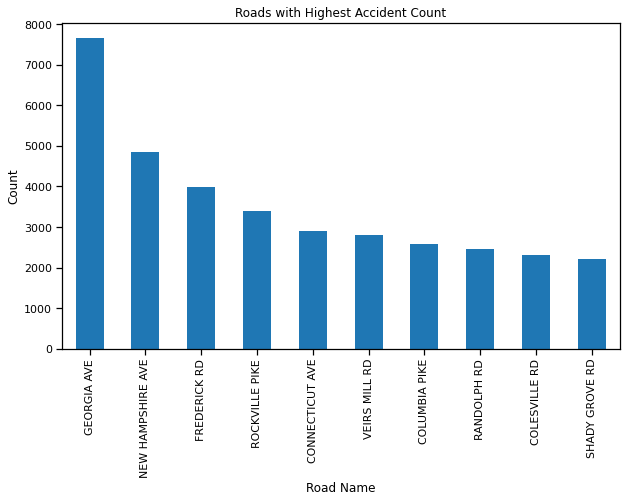

In [4]:
df["Road Name"].dropna().value_counts(ascending=False)[:10].plot.bar()
plt.title("Roads with Highest Accident Count")
plt.xlabel("Road Name")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

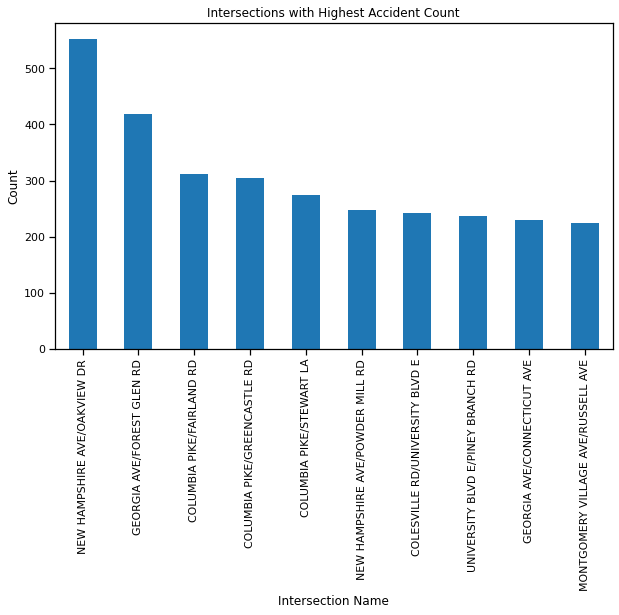

In [5]:
(df["Road Name"] + "/" + df["Cross-Street Name"]).dropna().value_counts(ascending=False)[:10].plot.bar()
plt.title("Intersections with Highest Accident Count")
plt.xlabel("Intersection Name")
plt.ylabel("Count")

Text(0.5, 1.0, 'Distribution of Accidents by Speed Limit')

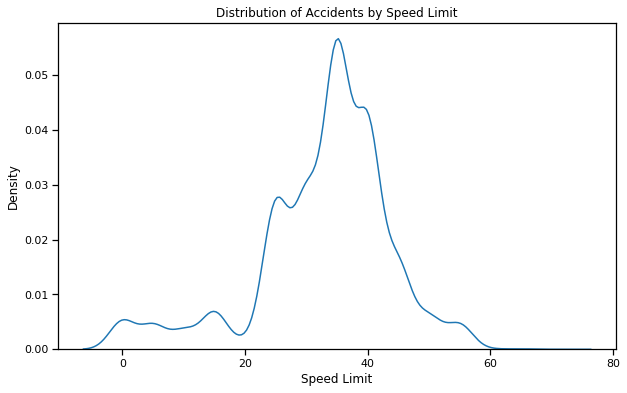

In [5]:
sns.kdeplot(df["Speed Limit"], bw_adjust=2.0)
plt.title("Distribution of Accidents by Speed Limit")

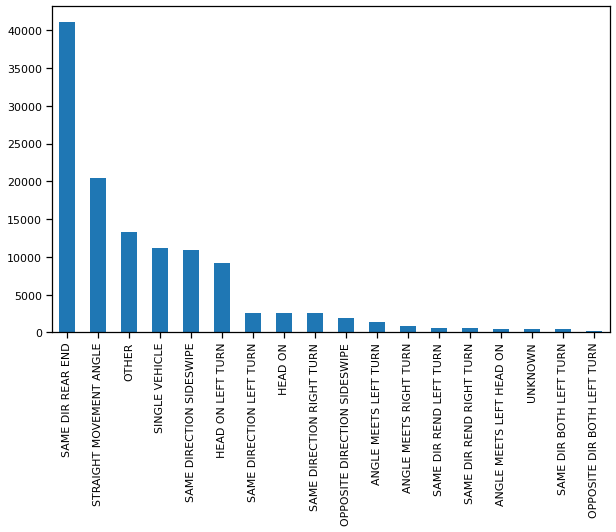

In [7]:
collsionTypeDF = df["Collision Type"].dropna().value_counts(ascending=False)
collsionInterDF = df["Collision Type"][(df["Traffic Control"] != "OTHER") & (df["Traffic Control"] != "UNKNOWN") & (df["Collision Type"] != "UNKNOWN") & (df["Collision Type"] != "OTHER")].dropna().value_counts(ascending=False).dropna()
collsion = collsionTypeDF.plot.bar()

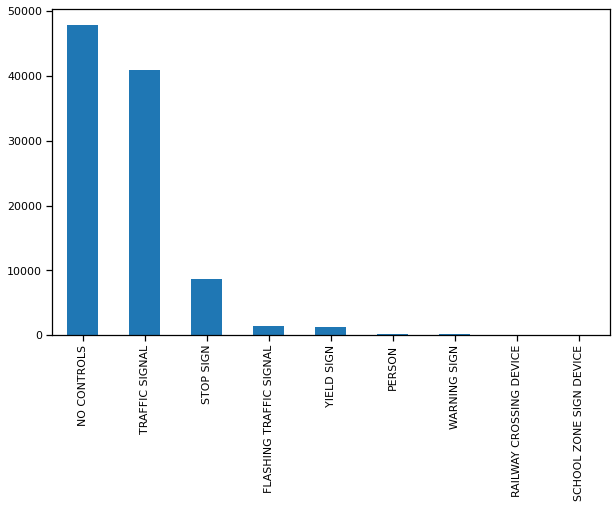

In [8]:
interType = df["Traffic Control"][(df["Traffic Control"] != "OTHER") & (df["Traffic Control"] != "UNKNOWN")].dropna().value_counts(ascending=False).plot.bar()